# Identificacao de Digitos Manuscritos (OCR) com Regressao Logistica

Usaremos o dataset [MNIST](http://yann.lecun.com/exdb/mnist/), que contem 70 mil exemplos de digitos manuscritos de 0 a 9. As imagens possuem 28 x 28 pixels, ou seja, possuem dimensionalidade 784.

Na documentacao do scikit-learn ha um [dataset similar](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), porem bem mais simples (toy dataset). Esse outro contem 1797 imagens 8x8, ou seja, de dimensionalidade 64. No entanto, eh uma boa opcao para fazer experimentos mais rapidamente (menor tempo de processamento). A documentacao inclui tambem um [exemplo](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) que utiliza esse toy dataset.


## Carga dos Dados (MNIST)

In [57]:
%matplotlib inline
from sklearn.datasets import fetch_openml

# Baixando os dados com openml (mnist: https://www.openml.org/d/554)

#uma forma de fazer
mnist = fetch_openml('mnist_784')

#outra forma de fazer
#data, target = fetch_openml('mnist_784', version=1, return_X_y=True)

## Verificando os shapes

In [58]:
# Shape das imagens
print("Shape das Imagens: " , mnist.data.shape)

# Shape dos labels
print("Shape dos Labels: ", mnist.target.shape)

Shape das Imagens:  (70000, 784)
Shape dos Labels:  (70000,)


## Split dos dados em treino e teste

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=0)

## Verificando os shapes

In [60]:
print("Shape das Imagens - treino", X_train.shape)

Shape das Imagens - treino (60000, 784)


In [61]:
print("Shape dos Labels - treino", y_train.shape)

Shape dos Labels - treino (60000,)


In [62]:
print("Shape das Imagens - teste", X_test.shape)

Shape das Imagens - teste (10000, 784)


In [63]:
print("Shape dos Labels - teste", y_test.shape)

Shape dos Labels - teste (10000,)


## Frequencia das Classes

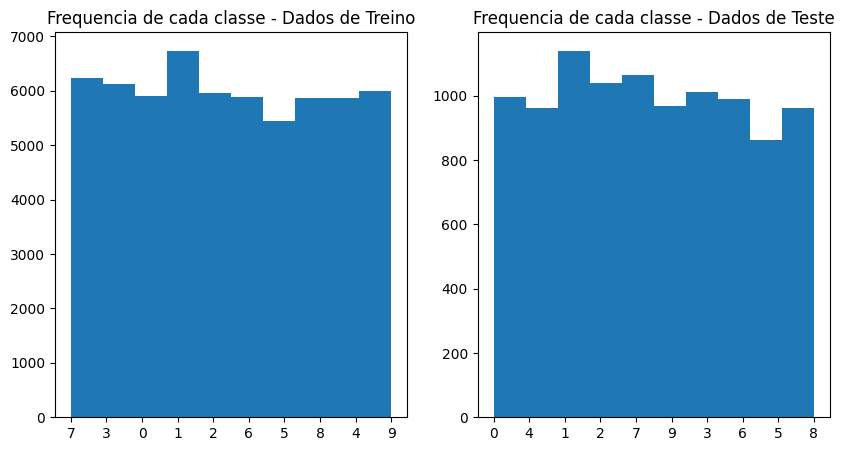

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequencia de cada classe - Dados de Treino');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequencia de cada classe - Dados de Teste');

## Observando as Imagens e os Labels

### Uma imagem (Valores)

In [65]:
X_train.values[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  40, 195, 126,   6,   0,   0,   

### Varias Imagens (visualizacao)

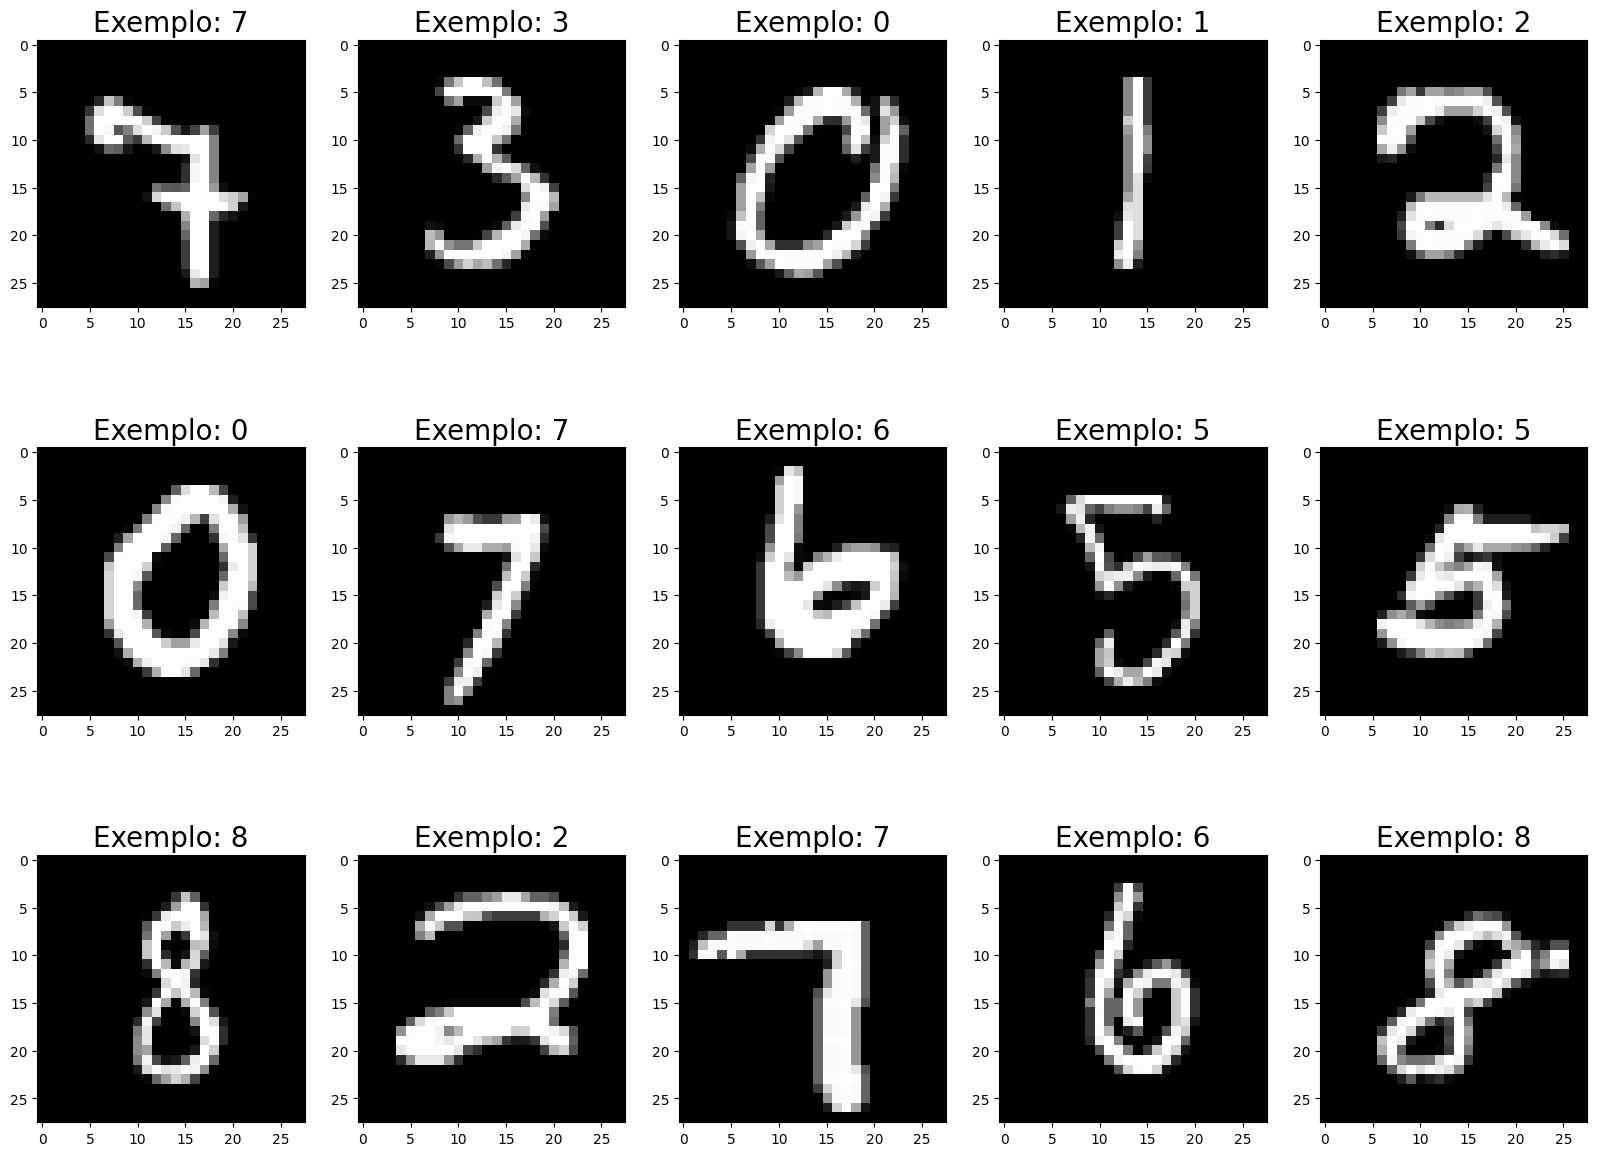

In [66]:
import numpy as np

plt.figure(figsize=(20,15))

for index, (image, label) in enumerate(zip(X_train.values[0:15], y_train.values[0:15])):
    plt.subplot(3, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Exemplo: {}'.format(label), fontsize = 20)

## Modelagem

### Imports

In [67]:
from sklearn.linear_model import LogisticRegression
import time

### Instanciando o Algoritmo de Aprendizagem

In [68]:
logisticRegr = LogisticRegression()

### Treino

In [69]:
#tempo antes
t0 = time.time()

#treinamento
logisticRegr.fit(X_train, y_train)

#tempo depois
run_time = time.time() - t0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predicoes no conjunto de teste

In [70]:
# Predicao para uma imagem
logisticRegr.predict(X_test.values[0].reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

In [71]:
# Predicoes para um conjunto de imagens
logisticRegr.predict(X_test[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [72]:
# Predicoes em todo o conjunto de teste
predictions = logisticRegr.predict(X_test)

## Avaliacao da Eficacia

### Acuracia

In [73]:
score = logisticRegr.score(X_test, y_test)
print('Acuracia: ', score)

Acuracia:  0.9184


### Matriz de Confusao

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_true=y_test,
                      y_pred = predictions,
                      labels = logisticRegr.classes_)
cm

array([[ 968,    0,    1,    1,    2,   10,    8,    2,    4,    0],
       [   0, 1115,    6,    2,    1,    4,    0,    4,    7,    2],
       [   4,   12,  933,   15,   12,    1,   15,    9,   35,    4],
       [   1,    5,   35,  892,    0,   25,    3,   12,   27,   13],
       [   1,    2,    5,    0,  898,    1,   11,   10,    6,   28],
       [   8,    2,    8,   31,    9,  746,   13,    5,   33,    8],
       [   8,    3,    8,    0,   11,   17,  936,    2,    4,    0],
       [   2,    5,   15,    4,   11,    2,    1,  980,    4,   40],
       [   4,   20,   11,   18,    7,   28,    9,    2,  854,   10],
       [   4,    4,    5,   10,   34,    8,    2,   32,    8,  862]])

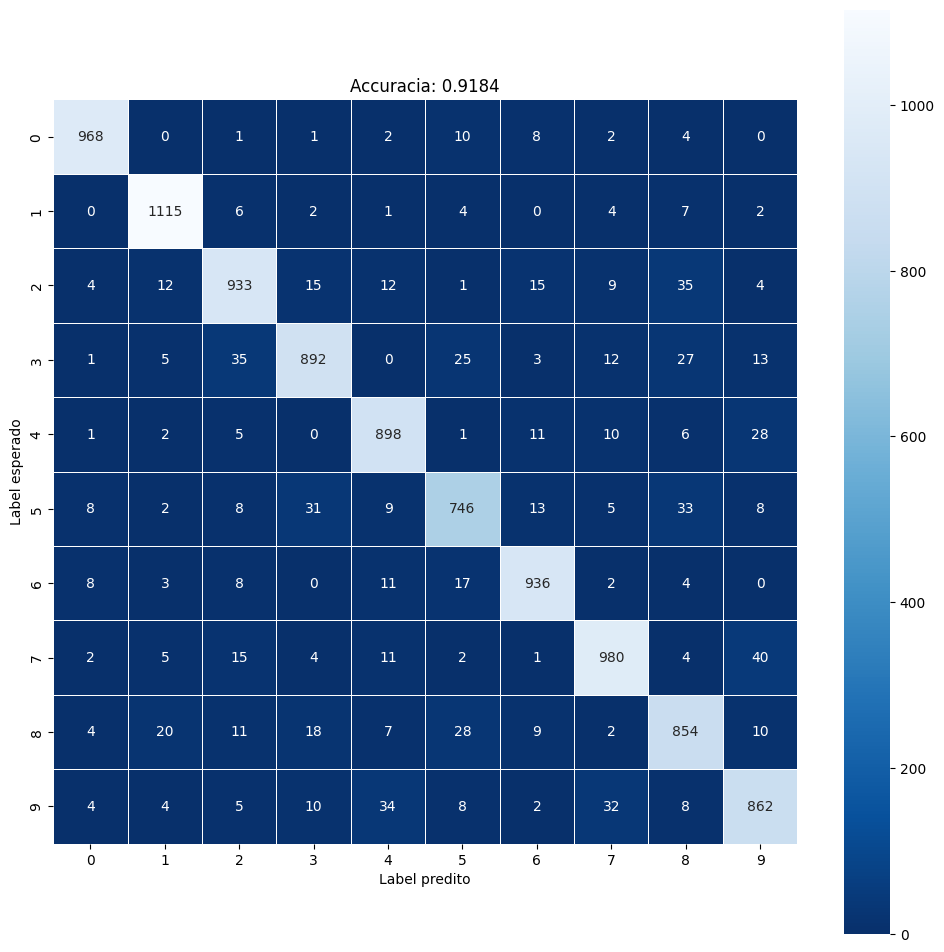

In [76]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True,
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Label esperado')
plt.xlabel('Label predito')
all_sample_title = 'Accuracia: {0}'.format(score)
plt.title(all_sample_title);

### Observando as erradas

In [77]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

print('Quantidade de errados: {}'.format(len(misclassifiedIndexes)))

Quantidade de errados: 816


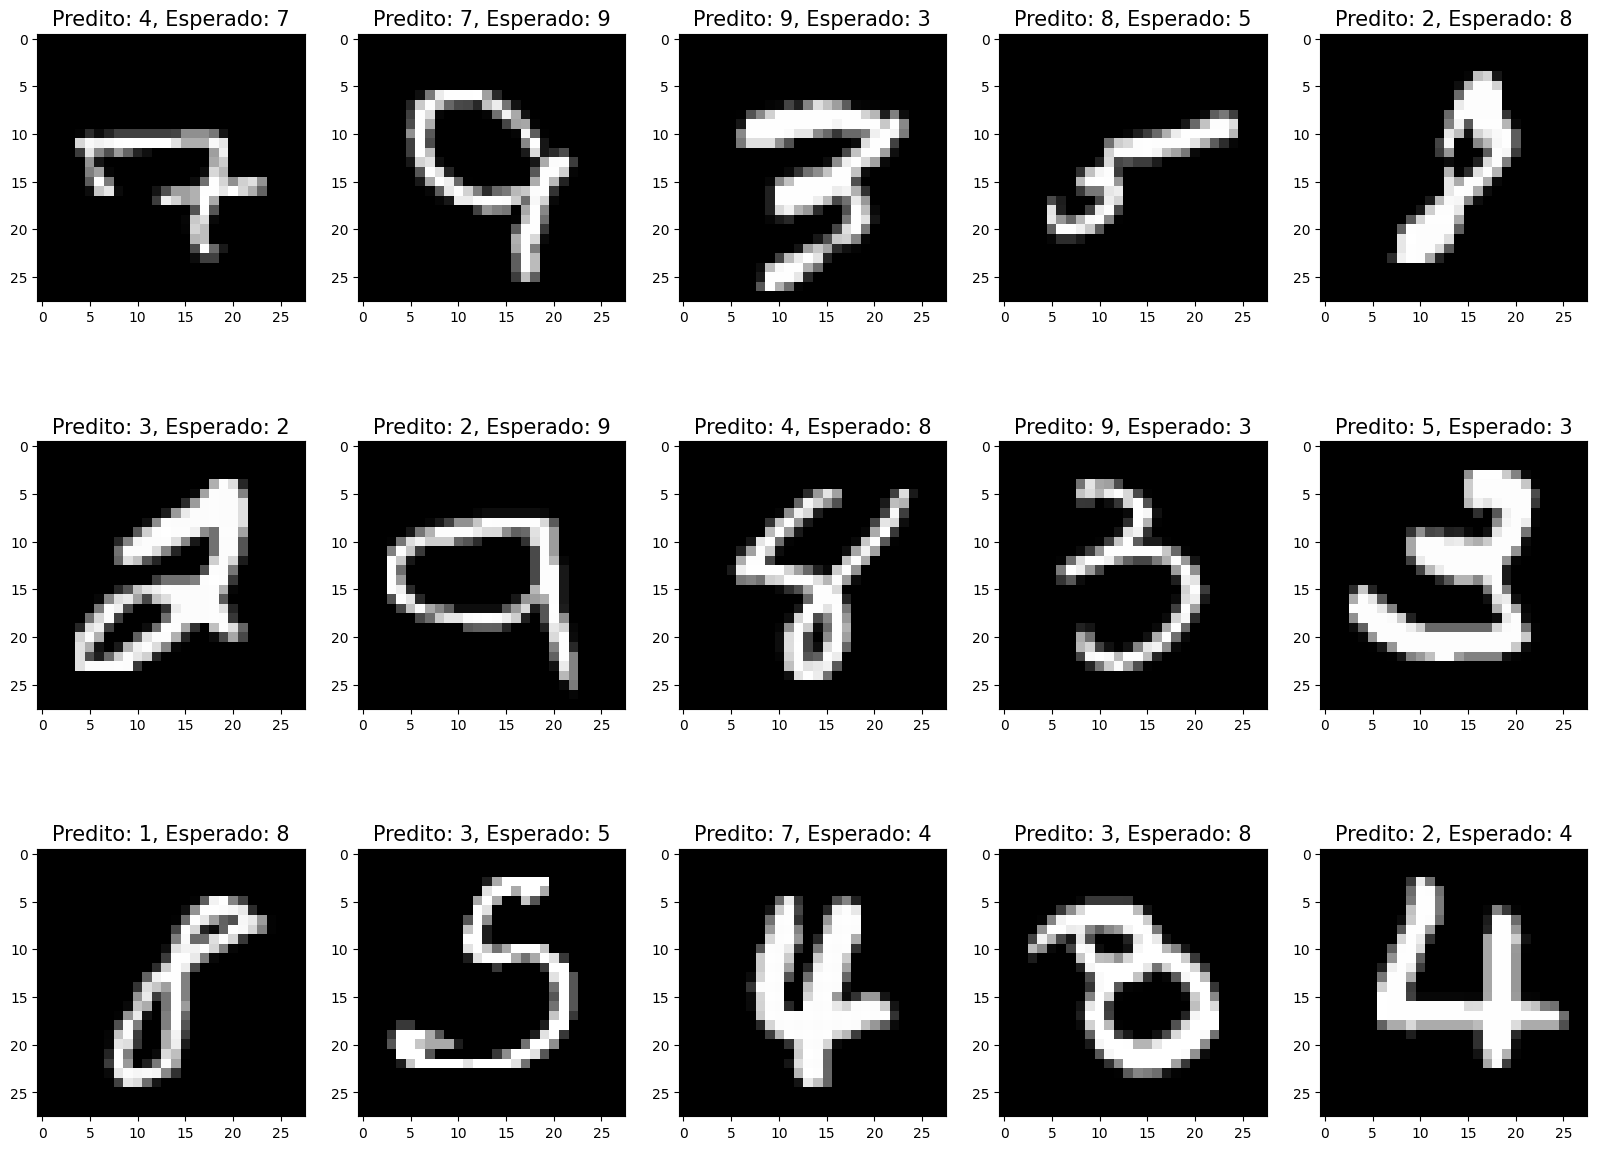

In [78]:
plt.figure(figsize=(20,15))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:15]):
    plt.subplot(3, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predito: {}, Esperado: {}'.format(predictions[badIndex], y_test.values[badIndex]), fontsize = 15)

# Outro exemplo com Regularizacao

### Imports

In [79]:
from sklearn.preprocessing import StandardScaler

### Split (treino e teste)

In [80]:
# Poucos para ser rapido. Aumentar depois. Total disponivel para treino: 60000.
train_samples = 5000

# Baixando de https://www.openml.org/d/554
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)


### Feature Scaling

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Instanciacao e Treino

In [82]:
# Para convergir mais rapidamente:
# C menor, tolerancia maior
clf = LogisticRegression(
    C = 50. / train_samples, penalty='l1', solver='saga', tol=0.1
)

#tempo antes
t0 = time.time()

#treinamento
clf.fit(X_train, y_train)

#tempo depois
run_time = time.time() - t0
print('Tempo de Execucao %.3f s' % run_time)

Tempo de Execucao 1.251 s


### Calculando a esparsidade e o score

In [83]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
print("Esparsidade: %.2f%%" % sparsity)
print("Score: %.4f" % score)

Esparsidade: 79.02%
Score: 0.8287


### Observando um coeficiente (valores)

In [84]:
print(clf.coef_[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

### Observando os coeficientes de forma visual

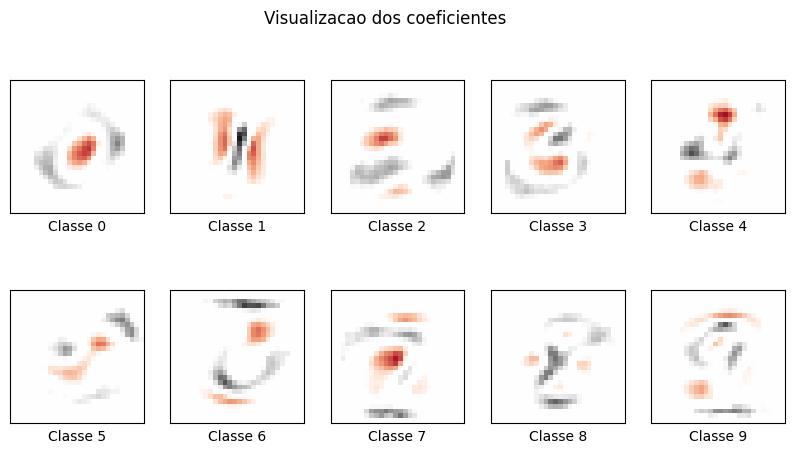

In [86]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdGy, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Classe %i' % i)
plt.suptitle('Visualizacao dos coeficientes')

plt.show()
